<a href="https://colab.research.google.com/github/quadribello/08-weather-conditions/blob/master/model/VAR_Temperature_forecasting_model_for_APAPA_LAGOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_station = pd.read_csv('https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Cleanedstationlocation.csv')
df_station.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [3]:
df_weather = pd.read_csv('https://raw.githubusercontent.com/HamoyeHQ/08-weather-conditions/master/data/Cleanedweathersummary.csv')
df_weather.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA
0,10001,1942-07-01,1,25,22,23,0,0,42,7,1
1,10001,1942-07-02,0,28,21,25,0,0,42,7,2
2,10001,1942-07-03,2,26,22,24,0,0,42,7,3
3,10001,1942-07-04,2,26,22,24,0,0,42,7,4
4,10001,1942-07-05,0,26,21,24,0,0,42,7,5


In [4]:
df_weather.drop(['YR','MO','DA'], axis=1,inplace = True)

In [5]:
from datetime import datetime
df_weather['datetime'] = pd.to_datetime(df_weather['Date'])
# setting STA as the index to select APAPA weather station 
df_weather = df_weather.set_index('STA')
df_weather.drop(['Date'], axis=1, inplace=True)
df_weather.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,datetime
STA,,,,,,,
10001,1,25,22,23,0,0,1942-07-01
10001,0,28,21,25,0,0,1942-07-02
10001,2,26,22,24,0,0,1942-07-03
10001,2,26,22,24,0,0,1942-07-04
10001,0,26,21,24,0,0,1942-07-05


In [6]:
df_weather = df_weather.loc['30001']
df_weather = df_weather.set_index('datetime')
df_weather.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
datetime,,,,,,
1943-06-09,23,28,22,25,0,1
1943-06-10,19,27,20,23,0,1
1943-06-11,0,28,21,24,0,1
1943-06-12,0,28,22,25,0,1
1943-06-13,0,29,25,27,0,1


In [7]:
df_weather.drop(['Snowfall','PoorWeather','Precip'], axis=1,inplace = True)

In [8]:
# save to file
df_weather.to_csv('weather.csv')

In [9]:
df_weather.describe()

,MaxTemp,MinTemp,MeanTemp
count,522.000000,522.000000,522.000000
mean,28.490421,22.662835,25.561303
std,1.771199,1.540658,1.353561
min,23.000000,16.000000,22.000000
25%,27.000000,22.000000,25.000000
50%,28.000000,22.000000,25.000000
75%,30.000000,23.000000,26.000000
max,32.000000,28.000000,30.000000


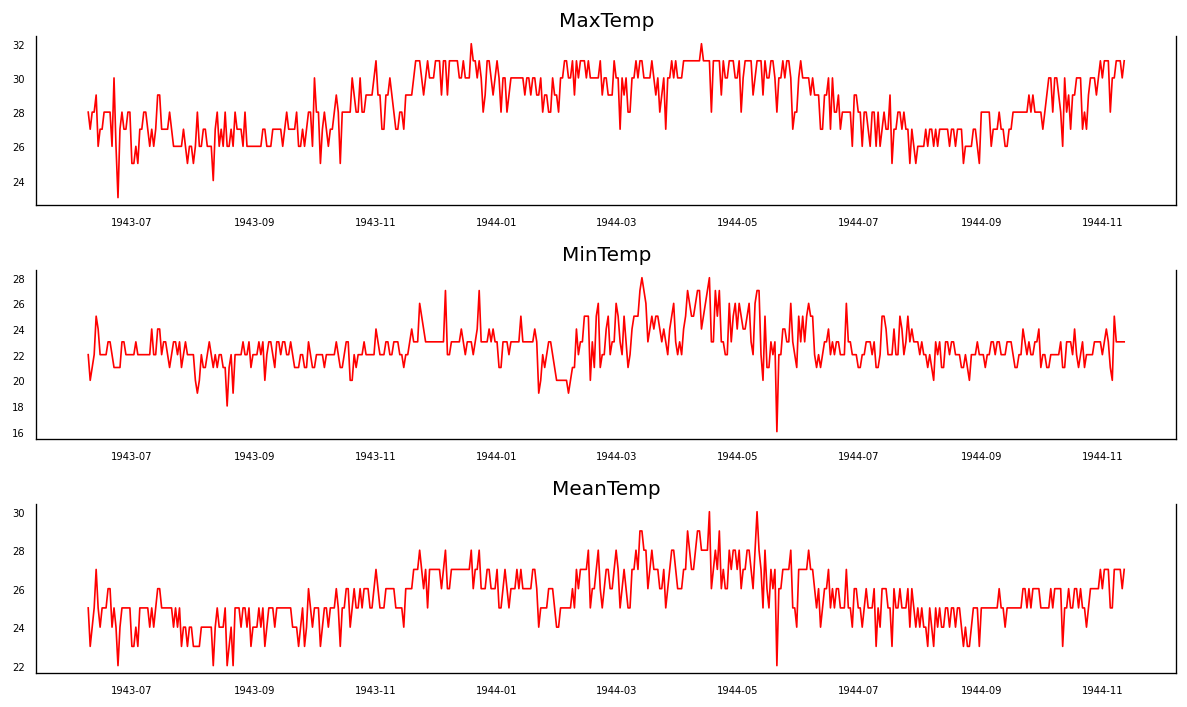

In [10]:
#Visualize the Time Series
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_weather[df_weather.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_weather.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

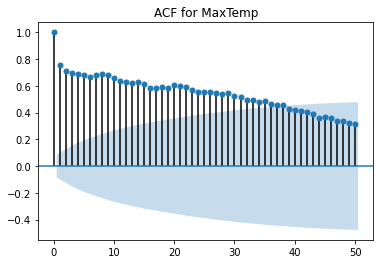

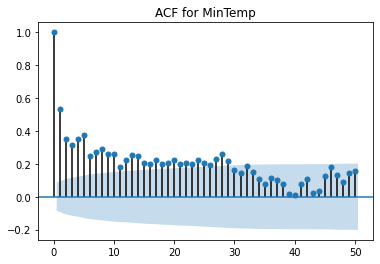

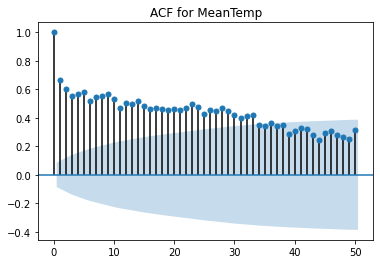

In [11]:
# plots the autocorrelation plots
for i in df_weather:
  plot_acf(df_weather[i], lags = 50)
  plt.title('ACF for %s' % i)
  plt.show()

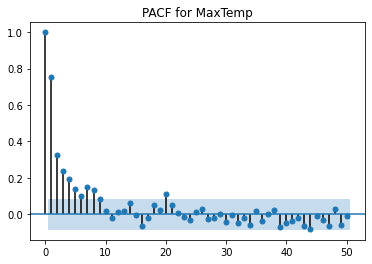

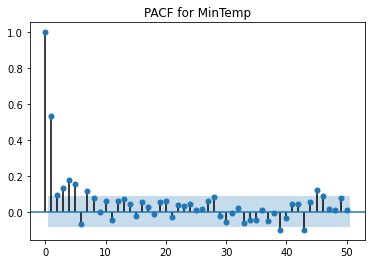

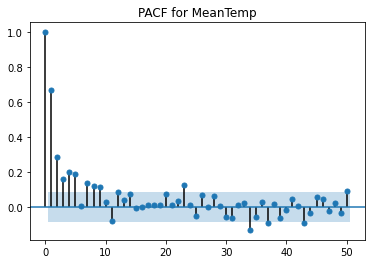

In [12]:
# plots the Partial autocorrelation plots
for i in df_weather:
  plot_pacf(df_weather[i], lags = 50)
  plt.title('PACF for %s' % i)
  plt.show()

In [13]:
# Stationarity check
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('Augmented Dickey-Fuller Test: MaxTemp Time Series')
augmented_dickey_fuller_statistics(df_weather['MaxTemp'])
print('Augmented Dickey-Fuller Test: MinTemp Time Series')
augmented_dickey_fuller_statistics(df_weather['MinTemp'])
print('Augmented Dickey-Fuller Test: MeanTemp Time Series')
augmented_dickey_fuller_statistics(df_weather['MeanTemp'])

Augmented Dickey-Fuller Test: MaxTemp Time Series
ADF Statistic: -1.625803
p-value: 0.469689
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: MinTemp Time Series
ADF Statistic: -4.258300
p-value: 0.000524
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: MeanTemp Time Series
ADF Statistic: -2.178289
p-value: 0.214219
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [14]:
# Split the Series into Training and Testing Data, I will hold back the last 7 days
n_obs = 7
X_train, X_test = df_weather[0:-n_obs], df_weather[-n_obs:]
# Check size
print(X_train.shape)
print(X_test.shape)

(515, 3)
(7, 3)


## Series transformation
A difference transform is a simple way for removing a systematic structure from the time series. I will remove trend by subtracting the previous value from each value in the series which is the first order differencing. To keep it simple, I will do first order differencing or seasonal differencing.


In [15]:
#X_train_log = np.log(X_train)  
X_train_log_diff =(X_train).diff().dropna()
X_train_log_diff.describe()

,MaxTemp,MinTemp,MeanTemp
count,514.000000,514.000000,514.000000
mean,0.000000,-0.001946,0.000000
std,1.247219,1.484815,1.106423
min,-4.000000,-7.000000,-5.000000
25%,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,4.000000,6.000000,4.000000


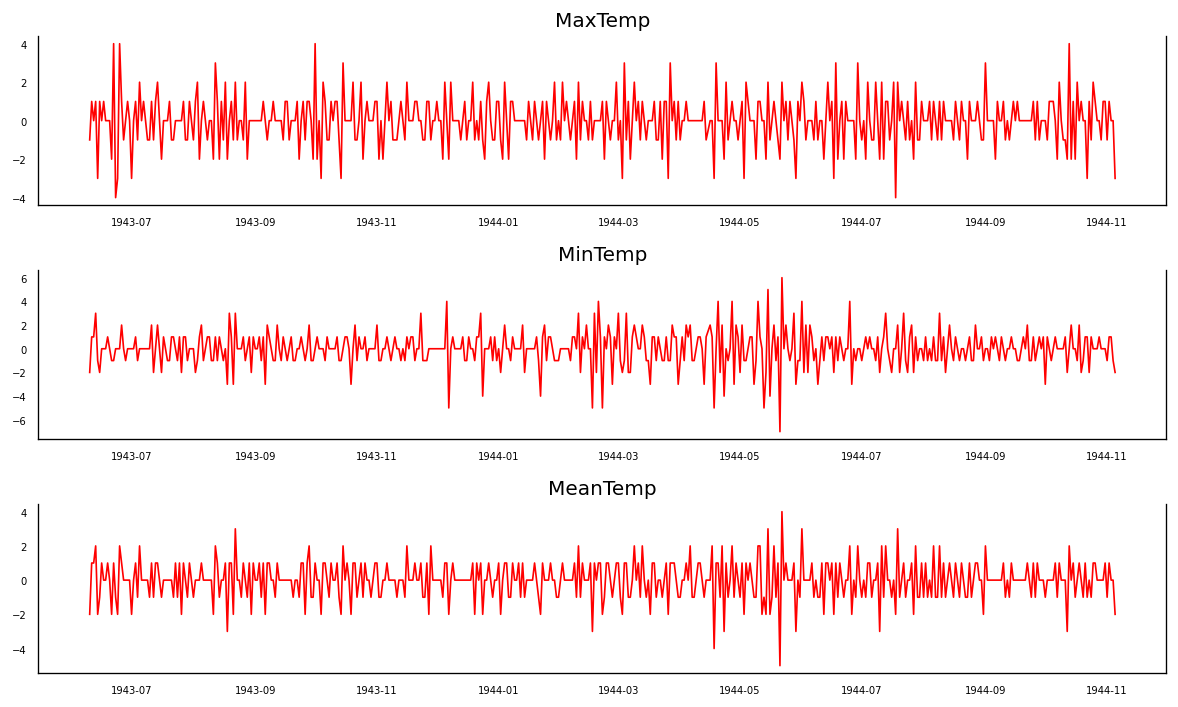

In [16]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = X_train_log_diff[X_train_log_diff.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_weather.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

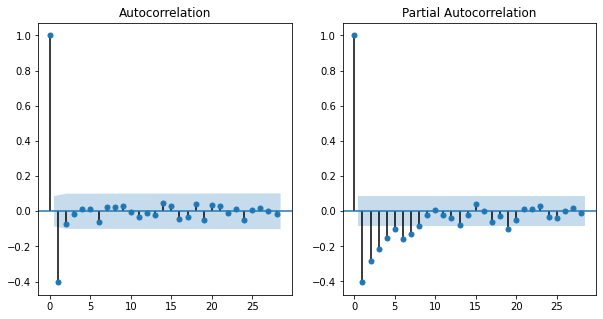

In [17]:
# Below function plots the auto-correlation plots
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['MaxTemp'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['MaxTemp'], ax=ax[1])

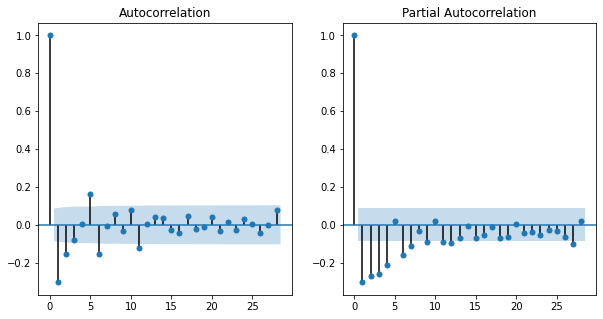

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['MinTemp'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['MinTemp'], ax=ax[1])

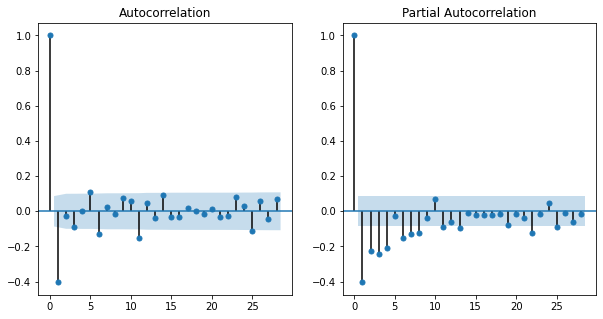

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10,5)) 
ax[0] = plot_acf(X_train_log_diff['MeanTemp'], ax=ax[0])
ax[1] = plot_pacf(X_train_log_diff['MeanTemp'], ax=ax[1])

In [20]:
# ADF Test - transformed series
print('Augmented Dickey-Fuller Test: MaxTemp Time Series')
augmented_dickey_fuller_statistics(X_train_log_diff['MaxTemp'])
print('Augmented Dickey-Fuller Test: MinTemp Time Series')
augmented_dickey_fuller_statistics(X_train_log_diff['MinTemp'])
print('Augmented Dickey-Fuller Test: MeanTemp Time Series')
augmented_dickey_fuller_statistics(X_train_log_diff['MeanTemp'])

Augmented Dickey-Fuller Test: MaxTemp Time Series
ADF Statistic: -13.163649
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: MinTemp Time Series
ADF Statistic: -9.601661
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Augmented Dickey-Fuller Test: MeanTemp Time Series
ADF Statistic: -9.357497
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


## Testing Causation using Granger’s Causality Test
The basis behind Vector AutoRegression is that each of the time series in the system influences each other. That is, you can predict the series with past values of itself along with other series in the system.

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.


Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

In simpler terms, the past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

In [21]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(df_weather)
x = model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,-0.1262,-0.1013,0.8815,-0.1164
1,-1.181,-1.082,0.3068,-1.142
2,-1.275,-1.101*,0.2794,-1.207
3,-1.314,-1.065,0.2688,-1.216*
4,-1.342,-1.019,0.2612,-1.215
5,-1.353,-0.9549,0.2584,-1.197
6,-1.352,-0.8788,0.2587,-1.167
7,-1.354*,-0.8063,0.2582*,-1.139
8,-1.351,-0.7288,0.2589,-1.107
9,-1.338,-0.6410,0.2623,-1.065



I have implemented Akaike’s Information Criteria (AIC) through the VAR (p) to determine the lag order value. 

In [22]:
#https://stackoverflow.com/questions/43443856/simple-granger-casuality-test-using-statsmodels-tsa-grangercausalitytests
from statsmodels.tsa.stattools import grangercausalitytests
maxlag= 7

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(df_weather, variables = df_weather.columns)

,MaxTemp_x,MinTemp_x,MeanTemp_x
MaxTemp_y,1.0,0.3625,0.1008
MinTemp_y,0.0,1.0000,0.0000
MeanTemp_y,0.0,0.0009,1.0000


In [23]:
model = VAR(X_train_log_diff)
x = model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,-0.1237,-0.09851,0.8836,-0.1138
1,-0.6587,-0.5578,0.5175,-0.6191
2,-0.8836,-0.7071,0.4133,-0.8143
3,-1.046,-0.7942,0.3512,-0.9474
4,-1.130,-0.8019*,0.3232,-1.001*
5,-1.137,-0.7338,0.3207,-0.9789
6,-1.179,-0.7004,0.3075,-0.9915
7,-1.201,-0.6460,0.3010,-0.9831
8,-1.212*,-0.5820,0.2976*,-0.9650
9,-1.206,-0.5001,0.2995,-0.9290


In [24]:
#Fit to a VAR model
model_fit = model.fit(maxlags=8)
#Print a summary of the model results
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 08, Oct, 2020
Time:                     22:49:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.590257
Nobs:                     506.000    HQIC:                 -0.971022
Log likelihood:          -1771.12    FPE:                   0.296272
AIC:                     -1.21672    Det(Omega_mle):        0.256365
--------------------------------------------------------------------
Results for equation MaxTemp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.020351         0.045448            0.448           0.654
L1.MaxTemp         -0.635961         0.071007           -8.956           0.000
L1.MinTemp          0.014896         0.064360            0.231    

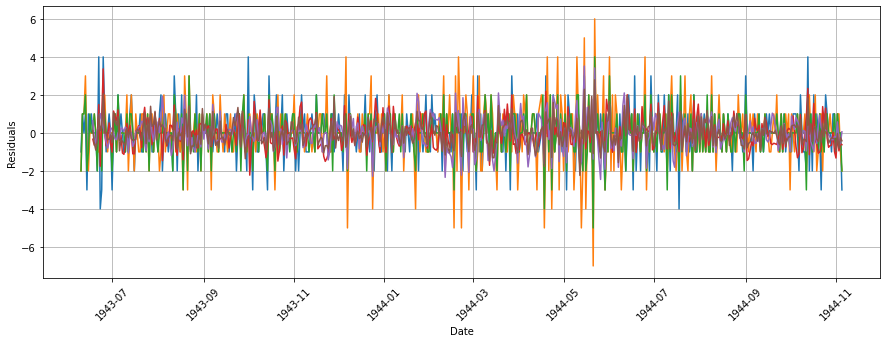

In [25]:
#Residual plot
y_fitted = model_fit.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(X_train_log_diff, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

Residual plot looks normal with constant mean throughout apart from some large fluctuation

## Durbin-Watson Test
Durbin-Watson Statistic is related to related to auto correlation.
The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no auto-correlation detected in the sample. Values from 0 to less than 2 indicate positive auto-correlation and values from 2 to 4 indicate negative auto-correlation. A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal. Any value outside this range could be a cause for concern

In [26]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fit.resid)
for col,val in zip(X_train_log_diff.columns,out):
  print((col), ':', round(val,2))

MaxTemp : 2.0
MinTemp : 2.0
MeanTemp : 2.02


In order to forecast, the VAR model expects up to the lag order number of observations from the past data.

This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [27]:
# Forecast VAR Model
# The forecasts are generated on the training data used by the model.
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)
# Input data for forecasting
input_data = X_train_log_diff.values[-lag_order:]
print(input_data)
# forecasting
pred = model_fit.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print(pred)

8
[[-1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]
 [ 0.  1.  0.]
 [ 0. -1.  0.]
 [-3. -2. -2.]]
            MaxTemp_pred  MinTemp_pred  MeanTemp_pred
datetime                                             
1944-11-06      1.612567      0.780487       0.585162
1944-11-07      0.525612      0.761794       0.634408
1944-11-08     -0.055502      0.039422      -0.037524
1944-11-09     -0.077329     -0.276193       0.061764
1944-11-10     -0.026012     -0.322952      -0.255077
1944-11-11      0.583438      0.520739       0.515387
1944-11-12     -0.323367      0.069820      -0.179595


## Invert transformation
So, to bring it back up to its original scale, I will need to de-difference to the original input data. Our data is 1st logarithm transformed and then differenced. So, to inverse, we have to first use cumulative sum to de-differentiate and then use exponential. Natural logarithm is the inverse of the exp().

In [28]:
# inverting transformation
def invert_transformation(X_train, pred_df):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
output = invert_transformation(X_train, pred)

In [29]:
print(output)

            MaxTemp_pred  MinTemp_pred  MeanTemp_pred
datetime                                             
1944-11-06     29.612567     21.780487      25.585162
1944-11-07     30.138178     22.542281      26.219570
1944-11-08     30.082676     22.581703      26.182045
1944-11-09     30.005347     22.305510      26.243810
1944-11-10     29.979335     21.982559      25.988733
1944-11-11     30.562773     22.503297      26.504120
1944-11-12     30.239406     22.573117      26.324524


In [30]:
#combining predicted and real data set
combine = pd.concat([output['MaxTemp_pred'], X_test['MaxTemp']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.MaxTemp_pred /row.MaxTemp *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.0f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=0)
combine = combine.reset_index()
combine = combine.sort_values(by='datetime', ascending=False)

In [31]:
print(combine)

    datetime  MaxTemp_pred  MaxTemp accuracy
6 1944-11-12          30.0       31      98%
5 1944-11-11          31.0       30     102%
4 1944-11-10          30.0       31      97%
3 1944-11-09          30.0       31      97%
2 1944-11-08          30.0       31      97%
1 1944-11-07          30.0       30     100%
0 1944-11-06          30.0       30      99%


In [32]:
combine = pd.concat([output['MinTemp_pred'], X_test['MinTemp']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.MinTemp_pred /row.MinTemp *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.0f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=0)
combine = combine.reset_index()
combine = combine.sort_values(by='datetime', ascending=False)
print(combine)

    datetime  MinTemp_pred  MinTemp accuracy
6 1944-11-12          23.0       23      98%
5 1944-11-11          23.0       23      98%
4 1944-11-10          22.0       23      96%
3 1944-11-09          22.0       23      97%
2 1944-11-08          23.0       23      98%
1 1944-11-07          23.0       25      90%
0 1944-11-06          22.0       20     109%


In [33]:
combine = pd.concat([output['MeanTemp_pred'], X_test['MeanTemp']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.MeanTemp_pred /row.MeanTemp *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.0f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=0)
combine = combine.reset_index()
combine = combine.sort_values(by='datetime', ascending=False)
print(combine)

    datetime  MeanTemp_pred  MeanTemp accuracy
6 1944-11-12           26.0        27      98%
5 1944-11-11           27.0        26     102%
4 1944-11-10           26.0        27      96%
3 1944-11-09           26.0        27      97%
2 1944-11-08           26.0        27      97%
1 1944-11-07           26.0        27      97%
0 1944-11-06           26.0        25     102%


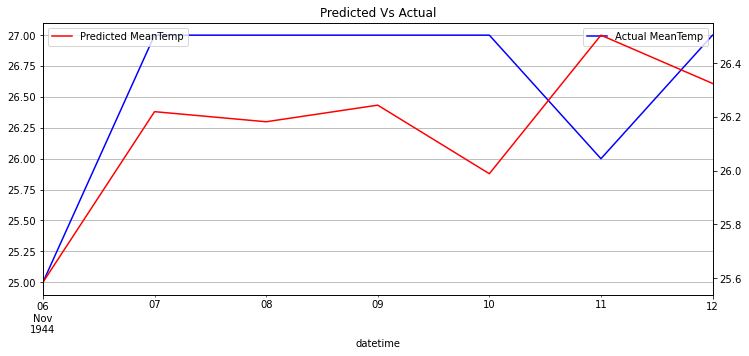

In [34]:
# Plot of Forecast vs Actuals
plt.figure(figsize=(12,5))
plt.xlabel('datetime')

ax1 = X_test.MeanTemp.plot(color='blue', grid = True, label = 'Actual MeanTemp')
ax2 = output.MeanTemp_pred.plot(color='red', grid = True, secondary_y=True, label = 'Predicted MeanTemp')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted Vs Actual')
plt.show()

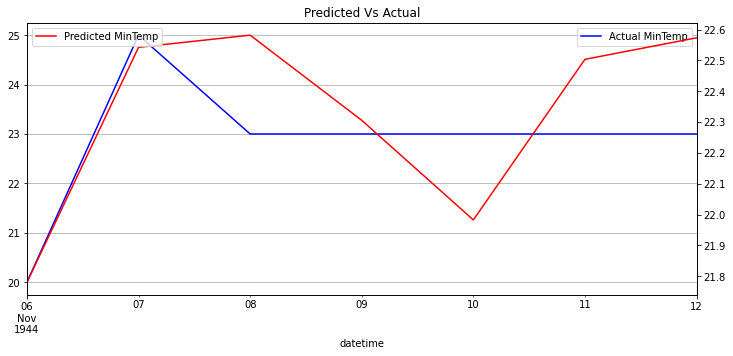

In [35]:
# Plot of Forecast vs Actuals
plt.figure(figsize=(12,5))
plt.xlabel('datetime')

ax1 = X_test.MinTemp.plot(color='blue', grid = True, label = 'Actual MinTemp')
ax2 = output.MinTemp_pred.plot(color='red', grid = True, secondary_y=True, label = 'Predicted MinTemp')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted Vs Actual')
plt.show()

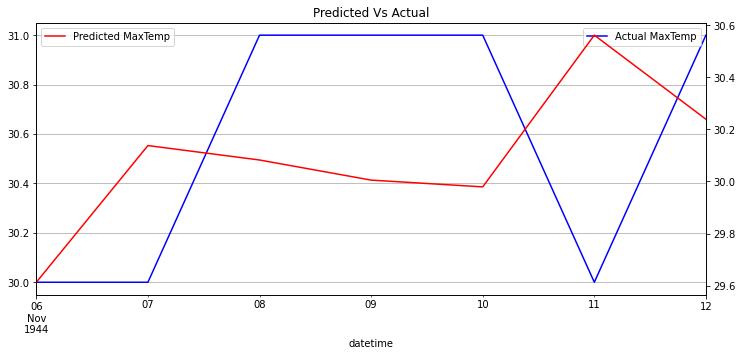

In [36]:
# Plot of Forecast vs Actuals
plt.figure(figsize=(12,5))
plt.xlabel('datetime')

ax1 = X_test.MaxTemp.plot(color='blue', grid = True, label = 'Actual MaxTemp')
ax2 = output.MaxTemp_pred.plot(color='red', grid = True, secondary_y=True, label = 'Predicted MaxTemp')

ax1.legend(loc=1)
ax2.legend(loc=2)
plt.title('Predicted Vs Actual')
plt.show()

In [37]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [38]:
print('Forecast Accuracy of: MaxTemp')
accuracy_prod = forecast_accuracy(output['MaxTemp_pred'].values, X_test['MaxTemp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))
print('Forecast Accuracy of: MinTemp')
accuracy_prod = forecast_accuracy(output['MinTemp_pred'].values, X_test['MinTemp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))
print('Forecast Accuracy of: MeanTemp')
accuracy_prod = forecast_accuracy(output['MeanTemp_pred'].values, X_test['MeanTemp'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

Forecast Accuracy of: MaxTemp
mape :  0.0222
me :  -0.4828
mae :  0.6831
mpe :  -0.0155
rmse :  0.75
corr :  -0.0517
minmax :  0.0221
Forecast Accuracy of: MinTemp
mape :  0.0457
me :  -0.533
mae :  1.0417
mpe :  -0.0203
rmse :  1.2723
corr :  0.7318
minmax :  0.0447
Forecast Accuracy of: MeanTemp
mape :  0.0275
me :  -0.4217
mae :  0.7329
mpe :  -0.0153
rmse :  0.7488
corr :  0.5598
minmax :  0.0274


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
